## Importing Requirements

In [5]:
import cv2
import matplotlib.pyplot as plt

### Reading Local Files

In [33]:
def detect_license_plate(image_path):
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    plate_cascade = cv2.CascadeClassifier('haarcascade_plate_number.xml')

    # Detect license plates in the image
    plates = plate_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Draw rectangles around detected license plates
    for (x, y, w, h) in plates:
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
        
        # Convert BGR image to RGB for displaying with matplotlib
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image_rgb)
        plt.axis('off')
        plt.show()
        
        # Extract the region of interest (ROI) using the bounding box coordinates
        roi = image[y:y+h, x:x+w]
                
        # Convert BGR ROI to RGB for displaying with matplotlib
        roi_rgb = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
        plt.imshow(roi_rgb)
        plt.axis('off')
        plt.show()

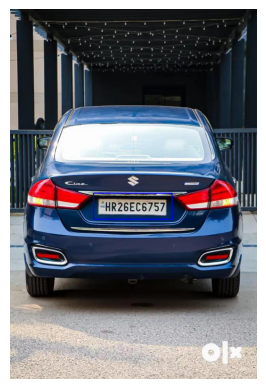

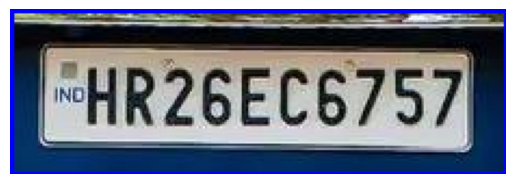

In [34]:
# Call the function with the image path
detect_license_plate('ciaz.jpg')

### Live Capture Object Detection

In [31]:
# Live Camera
def detect_license_plate_live():
     #Load the pre-trained Haar Cascade classifier for license plates
    # Make sure to provide the correct path to the haarcascade_russian_plate_number.xml file
    plate_cascade = cv2.CascadeClassifier('models/haarcascade_russian_plate_number.xml')
    # Open a connection to the webcam
    cap = cv2.VideoCapture()

    while True:
        # Capture frame-by-frame
        ret, frame = cap.read()

        # Convert the frame to grayscale
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect license plates in the frame
        plates = plate_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

        # Draw rectangles around detected license plates
        for (x, y, w, h) in plates:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

        # Display the resulting frame
        cv2.imshow('License Plate Detection', frame)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the capture
    cap.release()
    cv2.destroyAllWindows()

In [32]:
detect_license_plate_live()

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'
